In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../input/ipl-fods/final.csv")
print(df.shape)
df.head()

(92742, 11)


,match_id,inning,batting_team,bowling_team,overs,runs,wickets,venue,total_runs_y,runs_last_5,wickets_last_5
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.1,0,0,"Rajiv Gandhi International Stadium, Uppal",207,0.0,0.0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.2,0,0,"Rajiv Gandhi International Stadium, Uppal",207,0.0,0.0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.3,4,0,"Rajiv Gandhi International Stadium, Uppal",207,4.0,0.0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.4,4,0,"Rajiv Gandhi International Stadium, Uppal",207,4.0,0.0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.5,6,0,"Rajiv Gandhi International Stadium, Uppal",207,6.0,0.0


In [3]:
df = df[df['batting_team'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians','Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals']) & df['bowling_team'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians','Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals'])]

In [4]:
df.shape

(78672, 11)

In [5]:
# first let's remove unnecessary variables
df.drop(columns = ["match_id","inning"],inplace=True)
df.head(10)

,batting_team,bowling_team,overs,runs,wickets,venue,total_runs_y,runs_last_5,wickets_last_5
0,Sunrisers Hyderabad,Royal Challengers Bangalore,0.1,0,0,"Rajiv Gandhi International Stadium, Uppal",207,0.0,0.0
1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.2,0,0,"Rajiv Gandhi International Stadium, Uppal",207,0.0,0.0
2,Sunrisers Hyderabad,Royal Challengers Bangalore,0.3,4,0,"Rajiv Gandhi International Stadium, Uppal",207,4.0,0.0
3,Sunrisers Hyderabad,Royal Challengers Bangalore,0.4,4,0,"Rajiv Gandhi International Stadium, Uppal",207,4.0,0.0
4,Sunrisers Hyderabad,Royal Challengers Bangalore,0.5,6,0,"Rajiv Gandhi International Stadium, Uppal",207,6.0,0.0
5,Sunrisers Hyderabad,Royal Challengers Bangalore,0.6,6,0,"Rajiv Gandhi International Stadium, Uppal",207,6.0,0.0
6,Sunrisers Hyderabad,Royal Challengers Bangalore,0.7,7,0,"Rajiv Gandhi International Stadium, Uppal",207,7.0,0.0
7,Sunrisers Hyderabad,Royal Challengers Bangalore,1.1,8,0,"Rajiv Gandhi International Stadium, Uppal",207,8.0,0.0
8,Sunrisers Hyderabad,Royal Challengers Bangalore,1.2,12,0,"Rajiv Gandhi International Stadium, Uppal",207,12.0,0.0
9,Sunrisers Hyderabad,Royal Challengers Bangalore,1.3,13,0,"Rajiv Gandhi International Stadium, Uppal",207,13.0,0.0


In [6]:
# for prediction we want at least 5 overs data so that's here we train our model on above 5 overs data
df = df[df.overs > 5]

In [8]:
df.shape

(58624, 9)

In [7]:
# let's convert text data into lower case
df.venue = df.venue.str.lower()
df.batting_team = df.batting_team.str.lower()
df.bowling_team = df.bowling_team.str.lower()

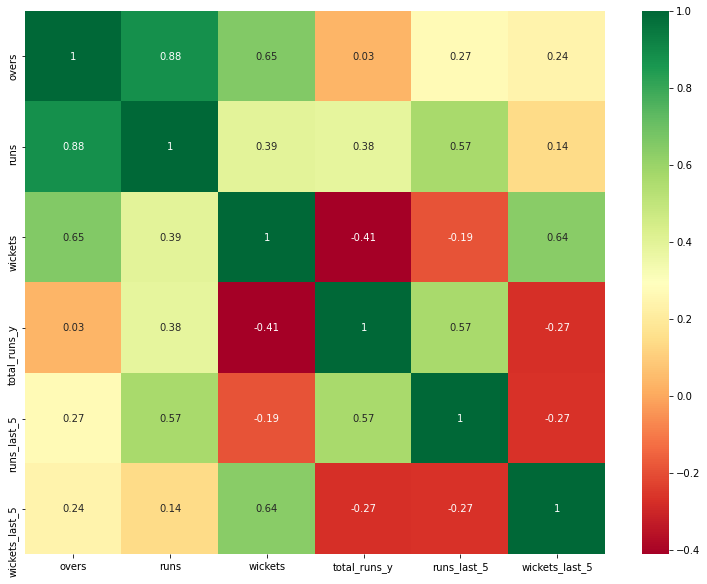

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')


In [13]:
df.venue.nunique()

30

In [16]:
encoded_df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team'],drop_first=True)
encoded_df.drop('venue',axis=1,inplace=True)
encoded_df.columns

Index(['overs', 'runs', 'wickets', 'total_runs_y', 'runs_last_5',
       'wickets_last_5', 'batting_team_delhi capitals',
       'batting_team_kings xi punjab', 'batting_team_kolkata knight riders',
       'batting_team_mumbai indians', 'batting_team_rajasthan royals',
       'batting_team_royal challengers bangalore',
       'batting_team_sunrisers hyderabad', 'bowling_team_delhi capitals',
       'bowling_team_kings xi punjab', 'bowling_team_kolkata knight riders',
       'bowling_team_mumbai indians', 'bowling_team_rajasthan royals',
       'bowling_team_royal challengers bangalore',
       'bowling_team_sunrisers hyderabad'],
      dtype='object')

In [18]:
print(encoded_df.shape)
encoded_df.head()

(58624, 20)


,overs,runs,wickets,total_runs_y,runs_last_5,wickets_last_5,batting_team_delhi capitals,batting_team_kings xi punjab,batting_team_kolkata knight riders,batting_team_mumbai indians,batting_team_rajasthan royals,batting_team_royal challengers bangalore,batting_team_sunrisers hyderabad,bowling_team_delhi capitals,bowling_team_kings xi punjab,bowling_team_kolkata knight riders,bowling_team_mumbai indians,bowling_team_rajasthan royals,bowling_team_royal challengers bangalore,bowling_team_sunrisers hyderabad
32,5.1,46,1,207,42.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
33,5.2,50,1,207,46.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
34,5.3,50,1,207,44.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
35,5.4,54,1,207,48.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
36,5.5,58,1,207,51.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(encoded_df)

In [22]:
X = encoded_df.drop(columns = "total_runs_y")
y = encoded_df.total_runs_y

In [23]:
# let's divide our data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
# Linear Regression

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error as mse

y_pred_lr = linear_regressor.predict(X_test)

print("---- Linear Regression - Model Evaluation ----")
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))
print("R-Square:",linear_regressor.score(X_test, y_test))

---- Linear Regression - Model Evaluation ----
Root Mean Squared Error (RMSE): 18.193890193075656
R-Square: 0.6257814435741789


In [43]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
y_pred_dt = decision_regressor.predict(X_test)

print("---- Decision Tree Regression - Model Evaluation ----")
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Root Mean Squared Error (RMSE): 13.410951671431654


In [45]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
y_pred_rf = random_regressor.predict(X_test)

print("---- Random Forest Regression - Model Evaluation ----")
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Root Mean Squared Error (RMSE): 9.201397463325474


In [48]:
# AdaBoost Model using Random Forest Regressor as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=random_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(), n_estimators=100)

In [49]:
y_pred_adb = adb_regressor.predict(X_test)

print("---- AdaBoost Regression - Model Evaluation ----")
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Root Mean Squared Error (RMSE): 11.976026865063771


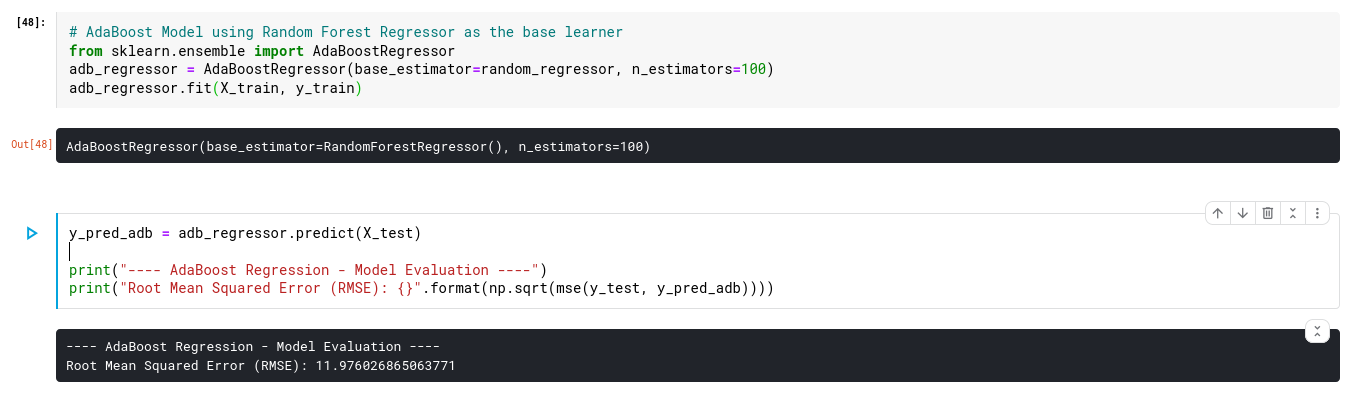

In [76]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    temp_array = list()

  # Batting Team
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Capitals':
        temp_array = temp_array + [1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,1]

  # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Capitals':
        temp_array = temp_array + [1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
    temp_array = [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]+temp_array

  # Converting into numpy array
    temp_array = np.array([temp_array])

  # Prediction
    return list([int(linear_regressor.predict(temp_array)[0]),int(random_regressor.predict(temp_array)[0]),int(adb_regressor.predict(temp_array)[0])])

**Prediction 1**
- Teams: Sunrisers Hyderabad vs. Delhi Capitals
- First Innings final score: 155/7

In [82]:
final_score = predict_score(batting_team='Delhi Capitals', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
# print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))
regressors = ["Linear","Random Forest","Adaboost"]
for i in range(len(final_score)):
    print(regressors[i],"--> b/w",final_score[i]-10,"to",final_score[i]+5)

Linear --> b/w 161 to 176
Random Forest --> b/w 157 to 172
Adaboost --> b/w 159 to 174


**Prediction 2**
- Teams: Delhi Capitals vs. Chennai Super Kings
- First Innings final score: 147/9

In [84]:
final_score = predict_score(batting_team='Delhi Capitals', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
# print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))
regressors = ["Linear","Random Forest","Adaboost"]
for i in range(len(final_score)):
    print(regressors[i],"--> b/w",final_score[i]-10,"to",final_score[i]+5)

Linear --> b/w 139 to 154
Random Forest --> b/w 146 to 161
Adaboost --> b/w 145 to 160


**Prediction 3**
- Teams: Rajasthan Royals vs. Chennai Super Kings
- First Innings final score: 151/7

In [85]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
regressors = ["Linear","Random Forest","Adaboost"]
for i in range(len(final_score)):
    print(regressors[i],"--> b/w",final_score[i]-10,"to",final_score[i]+5)

Linear --> b/w 129 to 144
Random Forest --> b/w 134 to 149
Adaboost --> b/w 132 to 147


**Prediction 4**
- Teams: Mumbai Indians vs. Kings XI Punjab
- First Innings final score: 176/7

In [86]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
regressors = ["Linear","Random Forest","Adaboost"]
for i in range(len(final_score)):
    print(regressors[i],"--> b/w",final_score[i]-10,"to",final_score[i]+5)

Linear --> b/w 181 to 196
Random Forest --> b/w 191 to 206
Adaboost --> b/w 185 to 200


In [ ]:
import pickle

with open("ipl.pickle", "wb")as f:
    pickle.dump(final_model, f)

In [ ]:
import json

features = {"columns": X.columns.to_list(), "team": list(team), "venue": list(venue)}

with open("features.json", "w") as f:
    json.dump(features, f)